In [1]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv

ctx = mx.gpu(0)

In [2]:
url = 'https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/segmentation/voc_examples/1.jpg'
filename = 'example.jpg'
gluoncv.utils.download(url, filename)

100%|██████████| 24/24 [00:00<00:00, 3294.93KB/s]


'example.jpg'

In [12]:
img = image.imread(filename)

from matplotlib import pyplot as plt
print(type(img), img.shape)

#plt.imshow(img.asnumpy())
#plt.show()

<class 'mxnet.ndarray.ndarray.NDArray'> (400, 500, 3)


In [13]:
from gluoncv.data.transforms.presets.segmentation import test_transform
img = test_transform(img, ctx)

In [18]:
model = gluoncv.model_zoo.get_model('fcn_resnet101_voc', pretrained=True, ctx=ctx)

In [19]:
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

[14:46:32] ../src/operator/cudnn_ops.cc:292: Auto-tuning cuDNN op, set MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable
[14:46:33] ../src/operator/cudnn_ops.cc:292: Auto-tuning cuDNN op, set MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable


In [20]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'pascal_voc')
mask.save('output.png')

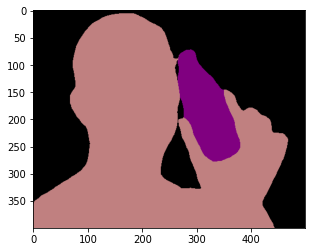

In [21]:
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()

In [23]:
output.shape

(1, 21, 400, 500)

In [25]:
predict

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [15., 15., 15., ...,  0.,  0.,  0.],
       [15., 15., 15., ...,  0.,  0.,  0.],
       [15., 15., 15., ...,  0.,  0.,  0.]], dtype=float32)